# Hello Fulcra: Connecting and Retrieving Your Data

> This notebook is an introduction to accessing your data using the Fulcra 
Data API.

This uses the `fulcra-api` module, which is available on PyPI; its source is on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).

Please reach out via issues or email if you have questions.


In [1]:
%pip install -qU fulcra-api


Note: you may need to restart the kernel to use updated packages.


In [2]:
from fulcra_api.core import FulcraAPI

fulcra = FulcraAPI()

## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end 
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded" 
displayed in the notebook output.  


In [3]:
fulcra.authorize()

## Retrieving Time Series Data (Multiple Metrics)

Once your `FulcraAPI` instance is authorized, you can now use it 
to make API calls.

The `time_series_grouped` function returns a pandas dataframe.

In [7]:
df = fulcra.time_series_grouped(
    start_time = "2023-07-01 04:00:00.000Z",
    end_time = "2023-07-10 04:00:00.000Z",
    metrics=["DistanceTraveledOnFoot", 
        "AppleWatchExerciseTime",
        "ActiveCaloriesBurned",
        "BasalCaloriesBurned"
    ]
)
df

,distance_on_foot,apple_watch_exercise_time,active_calories_burned,basal_calories_burned
time,,,,
2023-07-01 04:00:00+00:00,NaN,<NA>,0.124000,1.333887
2023-07-01 04:01:00+00:00,NaN,<NA>,0.187429,1.333887
2023-07-01 04:02:00+00:00,NaN,<NA>,0.191016,1.333887
2023-07-01 04:03:00+00:00,NaN,<NA>,0.246077,1.333887
2023-07-01 04:04:00+00:00,NaN,<NA>,0.292781,1.333887
...,...,...,...,...
2023-07-10 03:55:00+00:00,0.000000,<NA>,0.354810,1.375441
2023-07-10 03:56:00+00:00,0.000856,<NA>,0.281860,1.583422
2023-07-10 03:57:00+00:00,NaN,<NA>,0.359218,1.607195


<Axes: xlabel='time'>

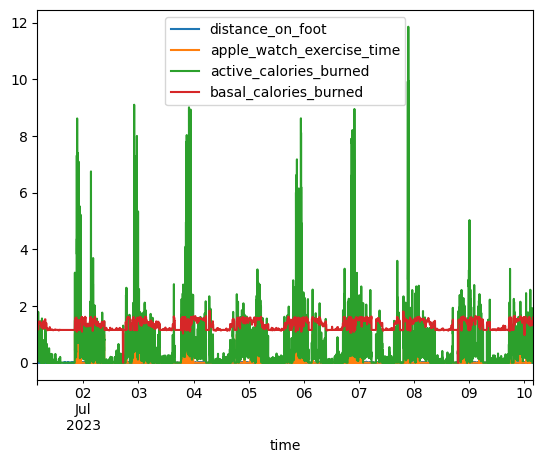

In [8]:
df.plot()

## Retrieving Time Series Data (Single Metric)

If you don't need multiple metrics at once, use the `metric_time_series` call.

In [6]:
singledf = fulcra.metric_time_series(
    start_time = "2023-07-01 04:00:00.000Z",
    end_time = "2023-07-10 04:00:00.000Z",
    metric="DistanceTraveledOnFoot"
)
singledf

,distance_on_foot
time,
2023-07-01 04:00:00+00:00,NaN
2023-07-01 04:01:00+00:00,NaN
2023-07-01 04:02:00+00:00,NaN
2023-07-01 04:03:00+00:00,NaN
2023-07-01 04:04:00+00:00,NaN
...,...
2023-07-10 03:55:00+00:00,NaN
2023-07-10 03:56:00+00:00,0.000856
2023-07-10 03:57:00+00:00,NaN


<Axes: xlabel='time'>

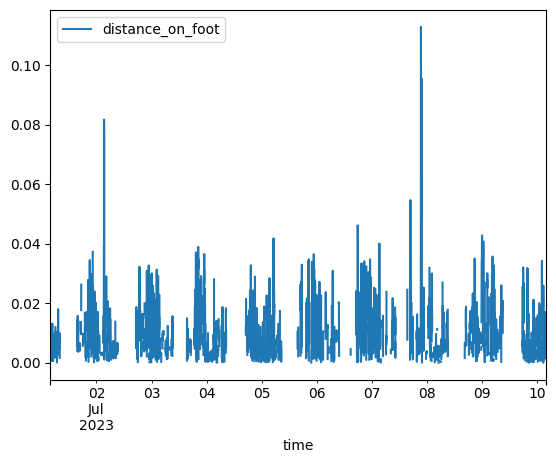

In [7]:
singledf.plot()

## Viewing Available Time Series Metrics

To get a list of the available values for the metric parameters in `metric_time_series` and `time_series_grouped` functions, use the `metrics_catalog` function:

In [8]:
fulcra.metrics_catalog()

[{'name': 'AFibBurden',
  'description': "A discrete measure of the percentage of time that the user's heart shows signs\n    of atrial fibrillation (AFib) during a given monitoring period.",
  'unit': 'percent',
  'is_time_series': True,
  'metric_kind': 'discrete',
  'value_column': 'afib_burden'},
 {'name': 'ActiveCaloriesBurned',
  'description': 'A cumulative measure of the amount of active energy the user has burned.',
  'unit': 'cal',
  'is_time_series': True,
  'metric_kind': 'cumulative',
  'value_column': 'active_calories_burned'},
 {'name': 'AlcoholicDrinksConsumed',
  'description': 'A cumulative measure of the amount of alcoholic beverages the user has consumed.',
  'unit': 'drinks',
  'is_time_series': True,
  'metric_kind': 'cumulative',
  'value_column': 'alcoholic_drinks_consumed'},
 {'name': 'AppetiteChange',
  'description': "A discrete measure that represents a change in the user's appetite.\n\n    The meanings of the values are:\n    0: An unspecified change in app

## Retrieving Calendars

If you've uploaded calendar events via Context, you can get an inventory of the
calendars by calling  `calendars()`:

In [45]:
calendars = fulcra.calendars()
calendars[0]

{'calendar_id': '02b761da-46d0-4074-a9c8-406fd0de3adf',
 'calendar_name': 'Birthdays',
 'calendar_color': '[0.5098039507865906,0.5843137502670288,0.686274528503418,1.0]',
 'calendar_source_id': '03da9f61-7b58-4021-8f40-a93548258faf',
 'calendar_source_name': 'Other',
 'fulcra_source': 'apple_calendar'}

## Retrieving Calendar Events

If you've uploaded calendar events via Context, you can retrieve them by calling 
`calendar_events()`.

There's an optional `calendar_ids` parameter that lets you select which calendars to query.

In [50]:
cal_events = fulcra.calendar_events(
    start_time = "2023-09-24 07:00:00.000Z",
    end_time = "2023-09-25 07:00:00.000Z",
    calendar_ids=["01fb4138-db27-4792-867d-5cfbdc720165"]
)


In [52]:
cal_events

[{'calendar_event_id': 'c409a249-24cd-4c19-b763-3683cc21b9f8',
  'calendar_id': '01fb4138-db27-4792-867d-5cfbdc720165',
  'start_date': '2023-09-24T20:10:00Z',
  'end_date': '2023-09-24T21:10:00Z',
  'allow_new_time_proposals': None,
  'alarms': ['19b7692e-7434-44be-a5ba-c8dfa338deb6'],
  'availability': 'free',
  'calendar_item_external_identifier': '7kukuqrfedlm2f9tfbe684r6cqpk9mrk0aqdeoan7jdbr93e7963lagn9uq6pdsbac40',
  'calendar_item_identifier': '22153B27-4BEE-480C-9627-F2EABC698103',
  'event_identifier': 'EC9D6240-04A7-4869-9D2E-1A7648EA7732:7kukuqrfedlm2f9tfbe684r6cqpk9mrk0aqdeoan7jdbr93e7963lagn9uq6pdsbac40',
  'creation_date': '2023-09-16T23:27:22Z',
  'has_alarms': True,
  'has_attendees': True,
  'has_notes': True,
  'has_recurrence_rules': False,
  'is_all_day': False,
  'is_detached': False,
  'last_modified_date': '2023-09-16T23:27:26Z',
  'location': 'PETCO Park',
  'notes': 'This event was created from an email you received in Gmail. https://mail.google.com/mail?extsrc

## Retrieving Apple Workout Events

If you've chosen to share Apple HealthKit workouts to your personal data store via Context, 
you can get details about them by using `apple_wirkouts`:

In [61]:
workouts = fulcra.apple_workouts(
    start_time = "2023-09-21 07:00:00.000Z",
    end_time = "2023-09-22 07:00:00.000Z"
)

In [64]:
workouts

[{'start_date': '2023-09-21T19:18:31.733000Z',
  'end_date': '2023-09-21T19:49:08.773000Z',
  'has_undetermined_duration': False,
  'apple_workout_id': '480b25fe-b229-41b9-bf13-7ccf5e2092ec',
  'duration': 1837.0397539138794,
  'extras': {'HKTimeZone': 'America/Los_Angeles',
   'HKAverageMETs': '4.37848 kcal/hr·kg',
   'HKIndoorWorkout': 0,
   'HKWeatherHumidity': '7000 %',
   'HKElevationAscended': '223 cm',
   'HKWeatherTemperature': '70.412 degF'},
  'all_statistics': {'HKQuantityTypeIdentifierHeartRate': {'unit': 'count/min',
    'average': 130.43537108053232,
    'endDate': '2023-09-21T19:49:08.773Z',
    'maximum': 149,
    'minimum': 99,
    'sources': [],
    'startDate': '2023-09-21T19:18:31.733Z',
    'quantityType': 'HKQuantityTypeIdentifierHeartRate'},
   'HKQuantityTypeIdentifierBasalEnergyBurned': {'sum': 54.348563210912246,
    'unit': 'Cal',
    'endDate': '2023-09-21T19:49:08.773Z',
    'sources': [],
    'startDate': '2023-09-21T19:18:31.733Z',
    'quantityType': 'HK

## Requesting Simple Events

If you're recording simple events via our API (e.g. from mood buttons), you can
retrieve these using `simple_events()`:

In [67]:
simple_events = fulcra.simple_events(
    start_time="2022-05-01 04:00:00.000Z", end_time="2023-08-03 04:00:00.000Z"
)

In [68]:
simple_events

[{'event_body': 'relieved',
  'category': 'mood',
  'event_id': '12680011-6668-4c8e-b4cd-3ca429445ac0',
  'timestamp': '2022-09-21T05:51:22Z'},
 {'event_body': 'relieved',
  'category': 'mood',
  'event_id': '208f1728-124e-4bee-a162-8494b8ecad59',
  'timestamp': '2022-09-21T16:59:49Z'},
 {'event_body': 'happy',
  'category': 'mood',
  'event_id': 'b74fa870-b265-4578-ab46-7cb920f4f1c3',
  'timestamp': '2022-09-21T17:44:21Z'},
 {'event_body': 'happy',
  'category': 'mood',
  'event_id': '478c093d-9e88-4b46-8f3a-0acdde3d89c0',
  'timestamp': '2022-09-21T17:44:58Z'},
 {'event_body': 'happy',
  'category': 'mood',
  'event_id': 'ef29c8ab-76ee-42ef-ba0f-d356e33da580',
  'timestamp': '2022-09-21T17:45:08Z'},
 {'event_body': 'foobar',
  'category': 'testxyz',
  'event_id': '9d93cbac-e641-4613-8b75-1dbf1b3c3b4f',
  'timestamp': '2023-07-18T06:41:54.366877Z'},
 {'event_body': 'foobar',
  'category': 'testxyz',
  'event_id': '5df49f5b-11f5-423e-a6cd-27c7b19e0a9a',
  'timestamp': '2023-07-27T05:37

You can also pass a `categories` list to `simple_events()` if you'd like to only get events from specific categories:

In [70]:
filtered_events = fulcra.simple_events(
    start_time="2022-05-01 04:00:00.000Z", end_time="2023-08-03 04:00:00.000Z",
    categories=["mood"]
)
[(e['event_body'], e['timestamp']) for e in filtered_events]

[('relieved', '2022-09-21T05:51:22Z'),
 ('relieved', '2022-09-21T16:59:49Z'),
 ('happy', '2022-09-21T17:44:21Z'),
 ('happy', '2022-09-21T17:44:58Z'),
 ('happy', '2022-09-21T17:45:08Z')]

## Retrieving Raw Samples from Time Series Metrics

Fulcra's data service does an excellent job of normalizing and prioritizing events 
for a given metric to present a clean time series.  However, if you'd like to get
the raw samples that comprise it, call `metric_samples()`.

In [72]:
samples = fulcra.metric_samples(
    start_time="2023-08-09 07:00:00.000Z", end_time="2023-08-10 07:00:00.000Z",
    metric="StepCount"
)  

In [75]:
samples[0]

{'start_date': '2023-08-09T18:43:05.974+00:00',
 'end_date': '2023-08-09T18:44:04.929+00:00',
 'extras': None,
 'has_undetermined_duration': False,
 'unit': 'count',
 'count': 1,
 'uuid': '201b3360-7458-4af5-9e67-49616a1364bd',
 'value': 30,
 'source_properties': {'name': 'Brandon’s Apple\xa0Watch',
  'version': '9.6',
  'productType': 'Watch5,3',
  'operatingSystemVersion': [9, 6, 0],
  'sourceBundleIdentifier': 'com.apple.health.7E2CA2FD-82AB-4F60-BEE3-4474DE238398'},
 'device_properties': {'name': 'Apple Watch',
  'model': 'Watch',
  'manufacturer': 'Apple Inc.',
  'hardwareVersion': 'Watch5,3',
  'softwareVersion': '9.6'}}

In [79]:
sum((s['value'] for s in samples if s['device_properties']['name'] == 'Apple Watch'))

29048

## Retrieving Location Update Samples

If you're sending Apple location update samples to your Fulcra data store--in Context, this
option is called "High Frequency Location"--then you can query these by calling
`apple_location_updates()`:

In [87]:
updates = fulcra.apple_location_updates(
    start_time="2023-09-24T20:00:00Z", 
    end_time="2023-09-24T21:10:00Z"
)

In [88]:
updates[0:2]

[{'speed': -1,
  'horizontal_accuracy_meters': 35,
  'longitude_degrees': -117.15661336566698,
  'source_is_simulated_by_software': False,
  'source_is_produced_by_accessory': False,
  'latitude_degrees': 32.706505158026005,
  'vertical_accuracy_meters': 3.0130748748779297,
  'course_heading_accuracy_degrees': -1,
  'course_heading_degrees': -1,
  'ellipsoidal_altitude_meters': -6.280021667480469,
  'floor': 0,
  'speed_accuracy_meters': -1,
  'altitude_meters': 29.17388153076172,
  'uuid': 'e80feacc-54e9-414f-86cb-8d6ebd85ea41',
  'timestamp': '2023-09-24T20:39:28.056+00:00'},
 {'speed': -1,
  'horizontal_accuracy_meters': 35,
  'longitude_degrees': -117.15661336566698,
  'source_is_simulated_by_software': False,
  'source_is_produced_by_accessory': False,
  'latitude_degrees': 32.706505158026005,
  'vertical_accuracy_meters': 3.0130748748779297,
  'course_heading_accuracy_degrees': -1,
  'course_heading_degrees': -1,
  'ellipsoidal_altitude_meters': -6.280021667480469,
  'floor': 0,


## Retrieving Location Visit Samples

If you're sending Apple location visit samples to your Fulcra data store
(this happens automatically if you've chosen to share location with Context),
you can get these out by calling `apple_location_visits()`:

In [89]:
visits = fulcra.apple_location_visits(
    start_time="2023-09-24T20:00:00Z", 
    end_time="2023-09-24T21:10:00Z"
)

**Note**: Because these are raw samples of Apple location visit objects, there are 
cases where `arrival_date` or `departure_date` may be missing.

In these cases, the values will not be null.  Instead, they will be a date far in the past
in the case of `arrival_date`, or far into the future for `departure_date`.

These values are gathered from Core Location `CLVisit` objects; for more information on them,
visit [Apple's Developer Documentation page](https://developer.apple.com/documentation/corelocation/clvisit)
about them.

In [91]:
visits[0]

{'longitude_degrees': -117.1916301958441,
 'latitude_degrees': 32.7841850572102,
 'arrival_date': '0001-01-01T00:00:00+00:00',
 'departure_date': '2023-09-25T22:20:22.018+00:00',
 'horizontal_accuracy_meters': 10.259480791395442,
 'uuid': 'd91619b2-25cd-4dd1-a65f-04ed7f922a60'}